In [72]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from activ import load_data
from PyUoI.UoINMF import UoINMF
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from activ.data_normalization import data_normalization
from scipy.spatial.distance import pdist
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
import h5py
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model

In [53]:
nmfdata = load_data(uoinmf=True)
rawdata = load_data(uoinmf=False)
raw_oc = rawdata.outcomes
raw_bm = rawdata.biomarkers
nmf_bm = nmfdata.biomarkers

In [42]:
nmf_bm.shape

(247, 6)

In [44]:
transformed_oc = PCA(n_components=1).fit_transform(raw_oc)
transformed_oc[:,0].shape

(247,)

In [45]:
rf = RandomForestRegressor(max_depth=2)
rf.fit(nmf_bm, transformed_oc)
acc = cross_val_score(rf, nmf_bm, transformed_oc, cv=5, scoring=metrics.make_scorer(metrics.r2_score))
print(nmf_bm.shape)
print(acc)


(247, 6)
[-0.0241171  -0.06520387 -0.05721301  0.06576183 -0.00619574]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_validatio

In [ ]:
cca = CCA(n_components=1)


[0.46330926 0.12544439 0.08504871 0.06573994 0.05823823 0.04913848
 0.02514921 0.02249134 0.0210888  0.01514242]


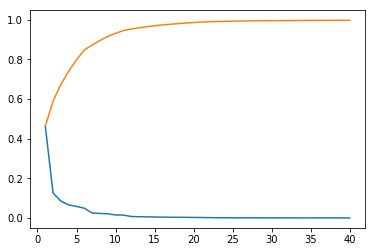

In [51]:
pca = PCA(n_components=40)
pca.fit_transform(raw_oc)
plt.plot(np.arange(40)+1, pca.explained_variance_ratio_)
plt.plot(np.arange(40)+1, np.cumsum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_[0:10])

In [85]:
knum = 5
kf = KFold(n_splits=knum)
eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
minsamples = np.arange(20,80,5)
transformed_oc = PCA(n_components=1).fit_transform(raw_oc)

r2s = list()
for k in range(2,20):
    db = DBSCAN(eps=0.5, min_samples=5)
    print("solving NMF with k = %d" % k)
    uoinmf = UoINMF(ranks=k, dbscan=db)
    uoinmf.nmf.set_params(max_iter=1000)
    weight = uoinmf.fit_transform(raw_bm)
    H = uoinmf.components_
    k = H.shape[0]
    regr = linear_model.LinearRegression()
    regr.fit(weight, transformed_oc[:,0])
    pred = cross_val_predict(regr, weight, transformed_oc[:,0], cv=5)
    r2 = metrics.r2_score(transformed_oc[:,0], pred)
    print(r2)
    r2s.append(r2)

solving NMF with k = 2
0.053340639583547955
solving NMF with k = 3
0.053714149790757726
solving NMF with k = 4
0.06275588314983116
solving NMF with k = 5
0.05776767549863837
solving NMF with k = 6
0.060060616066130224
solving NMF with k = 7
0.060308267882875244
solving NMF with k = 8
0.06398206361294212
solving NMF with k = 9
0.06725183561510562
solving NMF with k = 10
0.03895398416695317
solving NMF with k = 11
-0.033947015943614156
solving NMF with k = 12
-0.004819614496396563
solving NMF with k = 13
0.0072792385344501165
solving NMF with k = 14
-0.1441022068348925
solving NMF with k = 15
-0.10786684590963014
solving NMF with k = 16
-0.018601114239489513
solving NMF with k = 17
0.005746762419145179
solving NMF with k = 18
-0.35389861171041903
solving NMF with k = 19
-4.044000502147845


In [88]:
r2s

[0.053340639583547955,
 0.053714149790757726,
 0.06275588314983116,
 0.05776767549863837,
 0.060060616066130224,
 0.060308267882875244,
 0.06398206361294212,
 0.06725183561510562,
 0.03895398416695317,
 -0.033947015943614156,
 -0.004819614496396563,
 0.0072792385344501165,
 -0.1441022068348925,
 -0.10786684590963014,
 -0.018601114239489513,
 0.005746762419145179,
 -0.35389861171041903,
 -4.044000502147845]

[0.053340639583547955, 0.053714149790757726, 0.06275588314983116, 0.05776767549863837, 0.060060616066130224, 0.060308267882875244, 0.06398206361294212, 0.06725183561510562, 0.03895398416695317, -0.033947015943614156, -0.004819614496396563, 0.0072792385344501165, -0.1441022068348925, -0.10786684590963014, -0.018601114239489513, 0.005746762419145179, -0.35389861171041903, -4.044000502147845]


Text(0,0.5,'r2')

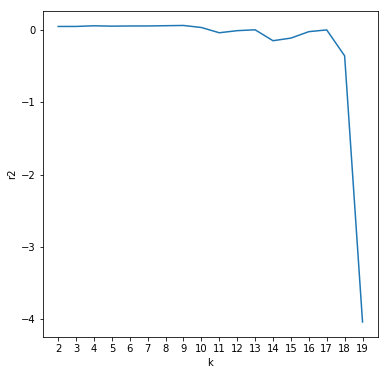

In [87]:
print(r2s)
plt.figure(figsize=(6,6))
plt.plot(np.arange(2,20), r2s)
plt.xticks(np.arange(2,20))
plt.xlabel('k')
plt.ylabel('r2')
# plt.savefig('/Users/ahyeon/Desktop/activ misc/k_19_mse.pdf')

In [98]:
knum = 5
kf = KFold(n_splits=knum)
eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
minsamples = np.arange(20,80,5)
transformed_oc = PCA(n_components=1).fit_transform(raw_oc)

ocpc = transformed_oc[:,0]

accs = list()
lrr2 = list()
for k in range(2,20):
    db = DBSCAN(eps=0.5, min_samples=5)
    print("solving NMF with k = %d" % k)
    uoinmf = UoINMF(ranks=k, dbscan=db)
    uoinmf.nmf.set_params(max_iter=1000)
    weight = uoinmf.fit_transform(raw_bm)
    H = uoinmf.components_
    k = H.shape[0]
    rf = RandomForestRegressor()
    rf.fit(weight, transformed_oc[:,0])
    pred = cross_val_predict(rf, weight, ocpc, cv=5)
    acc = metrics.mean_squared_error(pred, ocpc)
    accs.append(acc)
    lrr2.append(metrics.r2_score(ocpc, linear_model.LinearRegression().fit(weight, ocpc).predict(weight)))

solving NMF with k = 2
solving NMF with k = 3
solving NMF with k = 4
solving NMF with k = 5
solving NMF with k = 6
solving NMF with k = 7
solving NMF with k = 8
solving NMF with k = 9
solving NMF with k = 10
solving NMF with k = 11
solving NMF with k = 12
solving NMF with k = 13
solving NMF with k = 14
solving NMF with k = 15
solving NMF with k = 16
solving NMF with k = 17
solving NMF with k = 18
solving NMF with k = 19


Text(0,0.5,'r2')

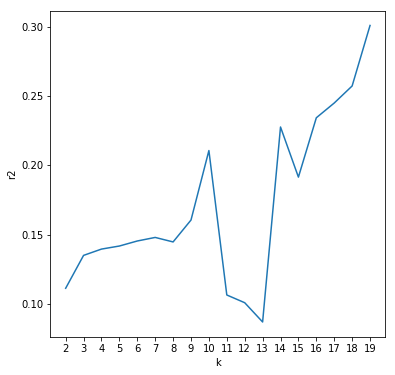

In [99]:
plt.figure(figsize=(6,6))
plt.plot(np.arange(2,20), lrr2)
plt.xticks(np.arange(2,20))
plt.xlabel('k')
plt.ylabel('r2')

Text(0,0.5,'mse')

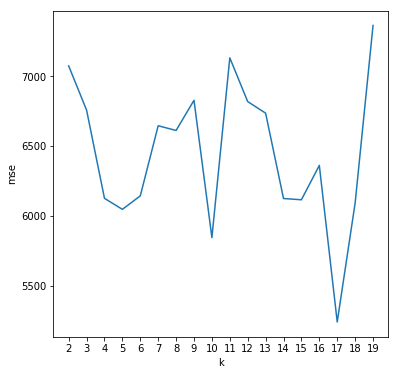

In [100]:
plt.figure(figsize=(6,6))
plt.plot(np.arange(2,20), accs)
plt.xticks(np.arange(2,20))
plt.xlabel('k')
plt.ylabel('mse')

In [101]:
np.std(accs)

513.7519066104398

In [102]:
np.mean(accs)

6449.769999984798

(array([1., 0., 4., 3., 4., 3., 1., 0., 1., 1.]),
 array([4914.98989667, 4991.39061208, 5067.79132749, 5144.1920429 ,
        5220.59275831, 5296.99347372, 5373.39418914, 5449.79490455,
        5526.19561996, 5602.59633537, 5678.99705078]),
 <a list of 10 Patch objects>)

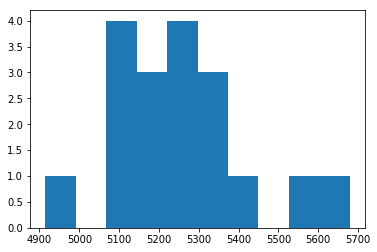

In [97]:
plt.hist(accs)